In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
cd /content/drive/MyDrive/MachineLearning/MachineLearning9

/content/drive/MyDrive/MachineLearning/MachineLearning9


### load and preprocessing data

In [4]:
train_data = pd.read_csv('train.csv')
train_data = train_data.replace(['female', 'male'], [0, 1])
train_data = train_data.replace(['S', 'C', 'Q'], [0, 1, 2])
train_data = train_data.fillna(0)
Y_train = train_data[['Survived']]
X_train = train_data[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked']]

Y_train = np.array(Y_train)
X_train = np.array(X_train)


In [5]:
test_data = pd.read_csv('test.csv')
test_data = test_data.replace(['female', 'male'], [0, 1])
test_data = test_data.replace(['S', 'C', 'Q'], [0, 1, 2])
test_data = test_data.fillna(0)
X_test = test_data[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked']]

test_label = pd.read_csv('gender_submission.csv')
Y_test = test_label[['Survived']]

Y_test = np.array(Y_test)
X_test = np.array(X_test)


### Model, train and test

In [6]:

model = tf.keras.models.Sequential([
                        tf.keras.layers.Dense(7, activation='relu'),
                        tf.keras.layers.Dense(64, activation='relu'),
                        tf.keras.layers.Dense(128, activation='relu'),
                        # tf.keras.layers.Dense(256, activation='relu'),
                        tf.keras.layers.Dense(2, activation='softmax')
                                    ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              # loss='mse',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

history = model.fit(X_train, Y_train, epochs=800)
# model.save('/content/drive/MyDrive/MachineLearning/MachineLearning9/model6.h5')



Epoch 1/800
28/28 [==============================] - 0s 1ms/step - loss: 0.8144 - accuracy: 0.4265
Epoch 2/800
28/28 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.5140
Epoch 3/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.6038
Epoch 4/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.6431
Epoch 5/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6599
Epoch 6/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.6487
Epoch 7/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6577
Epoch 8/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.6756
Epoch 9/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6453
Epoch 10/800
28/28 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.6554
Epoch 11/

Text(0, 0.5, 'Loss')

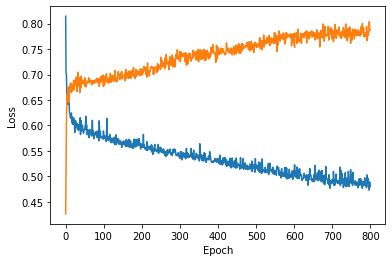

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [9]:
model = tf.keras.models.load_model("/content/drive/MyDrive/MachineLearning/MachineLearning9/model2.h5")
model.evaluate(X_test, Y_test)


14/14 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.9641


[0.29563194513320923, 0.9641148447990417]

In [11]:
Y_pred = model.predict(X_test)
predict = np.argmax(Y_pred, axis = 1)
predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,